## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [8]:
some_digit = x.iloc[30000]
some_digit_image = some_digit.to_numpy().reshape(28, 28)  #reshape it to plot

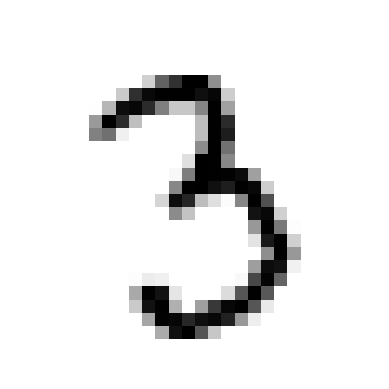

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[30000]

'3'

In [11]:
x_train = x[:60000]
x_test = x[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

## Creating a 2 detector

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==3)
y_test_2 = (y_test==3)

In [14]:
y_train

55043    8
58563    2
42637    0
813      2
35156    3
        ..
50062    1
15171    9
35418    4
39930    2
32529    7
Name: class, Length: 60000, dtype: int8

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(tol=0.1)

In [17]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [18]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
a =cross_val_score(clf, x_train, y_train_2, cv=2, scoring="accuracy")

In [20]:
print("Accuracy = ",a.mean() * 100)

Accuracy =  97.205
